<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Whether a loan is paid off</font></h1>
<h2 align="center"><font size="5">From 13h30 To 17h30 - 29/08/2021</font></h2>
<h3 align="center"><font size="5"> Total marks: 3.0</font></h3>

### Your information:
- Fullname: Đàm Thị Minh Phượng 
- Date of birth: 27/05/1990
- Place of birth: HoChiMinh City
- Email: minhphuong.dam@gmail.com
- Mobile phone: 0903222123

In this notebook, we practice all the knowledge and skills that we learned in this course (LDS5: Data pre-processing and analysis)

We apply the **Logistic Regression Algorithm** to predict: **"Whether a loan is paid off on in collection"** by accuracy evaluation methods.

Lets first load required libraries:

In [105]:
#import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns

In [106]:
import warnings
warnings.filterwarnings('ignore')

### About dataset

This dataset is about past loans. The __loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

# Data exploration

### *** To predict "Whether a loan is paid off", we need some fields: 'Principal', 'Terms', 'Age', 'Gender', 'Effective_date' 

### Load Data From CSV File  

In [107]:
# Read CSV file: loan_train.csv
cols_name = ['loan_status','Principal','terms','effective_date','due_date','age','education','Gender']
df = pd.read_csv('loan_train.csv', usecols=cols_name)

In [108]:
# Understanding to dataset
df.shape

(346, 8)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     346 non-null    object
 1   Principal       346 non-null    int64 
 2   terms           346 non-null    int64 
 3   effective_date  346 non-null    object
 4   due_date        346 non-null    object
 5   age             346 non-null    int64 
 6   education       346 non-null    object
 7   Gender          346 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.8+ KB


In [110]:
df.tail()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [111]:
df.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


### Identify Variables

In [112]:
inputs = ['Principal','terms','effective_date','due_date','age','education','Gender']
output = ['loan_status']

In [113]:
i = 1
for var in df.columns:
    print(i,'/', var, '\t', len(df[var].unique()),df[var].unique() if len(df[var].unique())<25 else '')
    i += 1

1 / loan_status 	 2 ['PAIDOFF' 'COLLECTION']
2 / Principal 	 5 [1000  800  300  900  500]
3 / terms 	 3 [30 15  7]
4 / effective_date 	 7 ['9/8/2016' '9/9/2016' '9/10/2016' '9/11/2016' '9/12/2016' '9/13/2016'
 '9/14/2016']
5 / due_date 	 23 ['10/7/2016' '9/22/2016' '10/8/2016' '9/24/2016' '9/16/2016' '10/9/2016'
 '10/10/2016' '9/25/2016' '9/17/2016' '11/9/2016' '10/25/2016' '9/26/2016'
 '10/11/2016' '11/10/2016' '9/18/2016' '10/26/2016' '9/19/2016'
 '10/12/2016' '9/27/2016' '9/28/2016' '10/13/2016' '11/12/2016'
 '9/23/2016']
6 / age 	 32 
7 / education 	 4 ['High School or Below' 'Bechalor' 'college' 'Master or Above']
8 / Gender 	 2 ['male' 'female']


In [114]:
cat_var = ['loan_status','Principal','terms','effective_date','due_date','education','Gender']
num_var = ['age']

### Univariate Analysis

In [115]:
# NUMBER VARIABLE
def univariate_cont_analysis(var,df):
    mean = df[var].mean()
    median = df[var].median() 
    mode = df[var].mode()
    max_val = df[var].max()
    min_val = df[var].min()
    range_val = np.ptp(df[var])
    variance = df[var].var()
    skewness = df[var].skew()
    kurtosis = df[var].kurtosis()
    result = [mean,median,mode,max_val,min_val,range_val,variance,skewness,kurtosis]
    return result

In [116]:
result = univariate_cont_analysis('age',df)
df_result = pd.DataFrame(result,index=['mean','median','mode','max_val','min_val','range_val','variance','skewness','kurtosis'],
                  columns=num_var)
df_result.T

,mean,median,mode,max_val,min_val,range_val,variance,skewness,kurtosis
age,30.9393,30,0 26 dtype: int64,51,18,33,36.4746,0.70041,0.481063


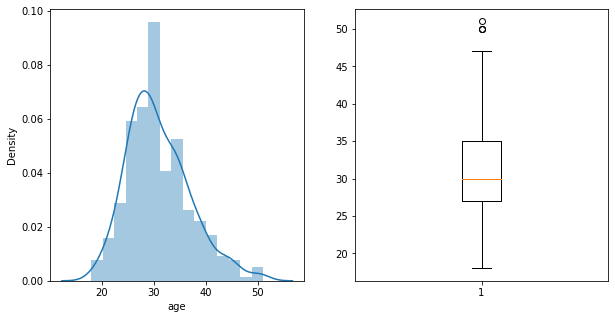

In [117]:
#Visualization - Histogram & boxplot
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(df['age'])
plt.subplot(122)
plt.boxplot(df['age'])
plt.show()

### Nhận xét:
- Biến 'age' có phân phối lệch phải, variance không lớn
- Biến 'age' có upper outliers

In [118]:
# CATEGORICAL VARIABLE
# cat_var = ['loan_status','Principal','terms','effective_date','due_date','education','Gender']

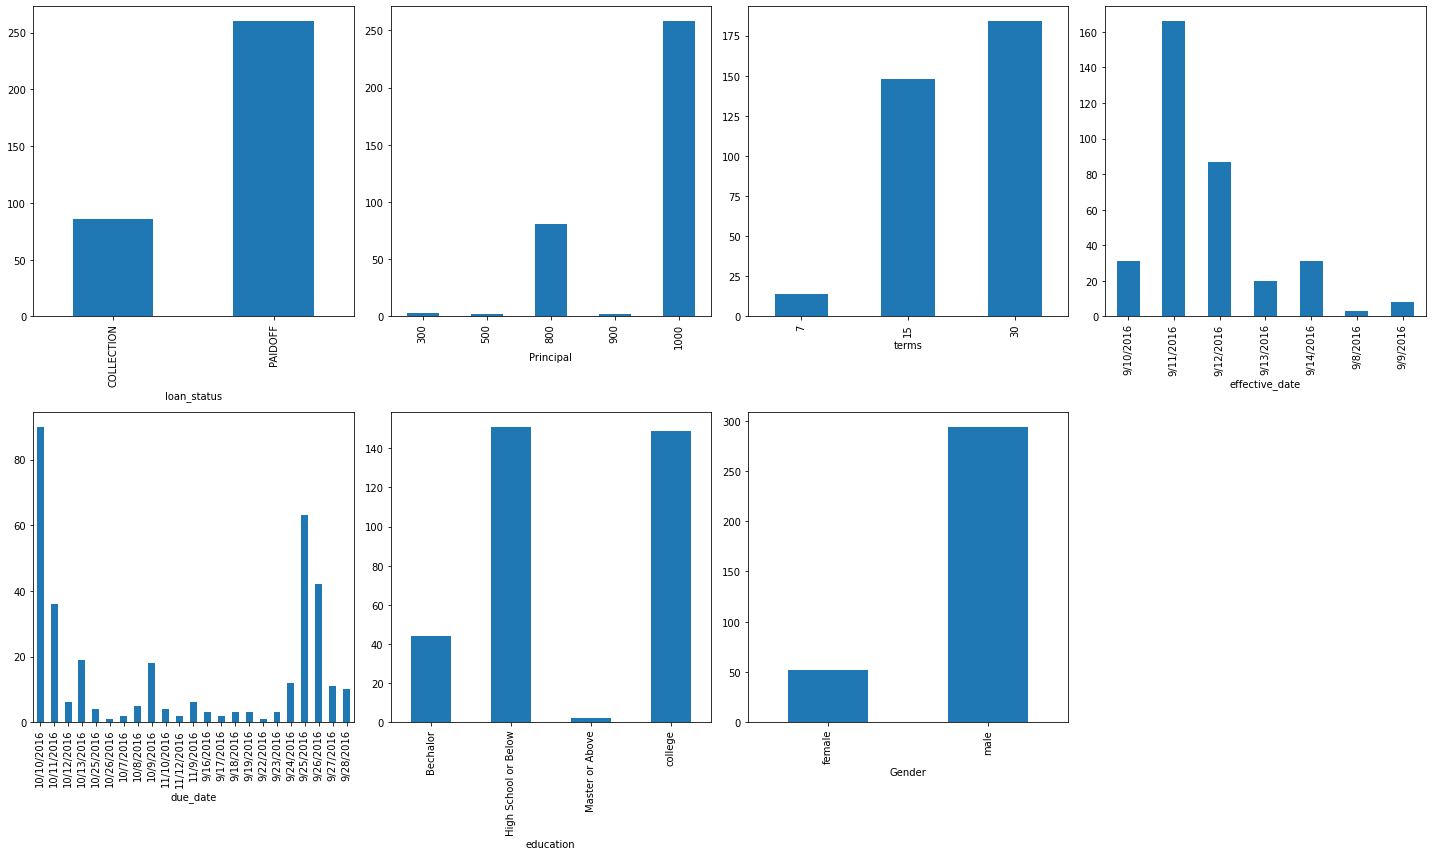

In [119]:
plt.figure(figsize=(20,12))
for i in range (1,len(cat_var)+1):
    count = df.groupby(df[cat_var[i-1]]).size()
    #print(count)
    plt.subplot(2,4,i)
    count.plot.bar()
plt.tight_layout()
plt.show()

### Nhận xét:
- Có sự khác biệt giữa các phân loại của mỗi biến (biến phân loại có ý nghĩa)

### Bi-variate Analysis

In [120]:
# CONTINUOUS - 'loan_status'

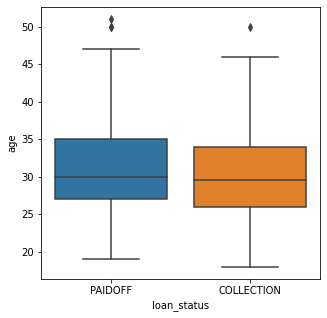

In [121]:
plt.figure(figsize=(5,5))
df_melt = df[['age','loan_status']]
sns.boxplot(data=df_melt,x='loan_status',y='age' )
plt.show()

### Nhận xét:
- có thể nhận xét 'age' và 'loan_status' không phụ thuộc hoặc phụ thuộc rất ít 
- Dùng Anova test để kiểm tra

In [122]:
#Anova Test 
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('age ~ C(loan_status)', df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)
if anova_table['PR(>F)'][0] < 0.05:
    print(var,'p-value:',anova_table['PR(>F)'][0])
    print('==> Dependent (Reject H0)')
else: 
    print(var,'p-value:',anova_table['PR(>F)'][0])
    print('==> Independent (Fail to Reject H0)')

,sum_sq,df,F,PR(>F)
C(loan_status),9.502088,1.0,0.259954,0.610479
Residual,12574.223345,344.0,NaN,NaN


Gender p-value: 0.610478777694581
==> Independent (Fail to Reject H0)


### Nhận xét:
- 'age' độc lập với 'loan_status'

In [123]:
# CATEGORICAL - 'loan_status'

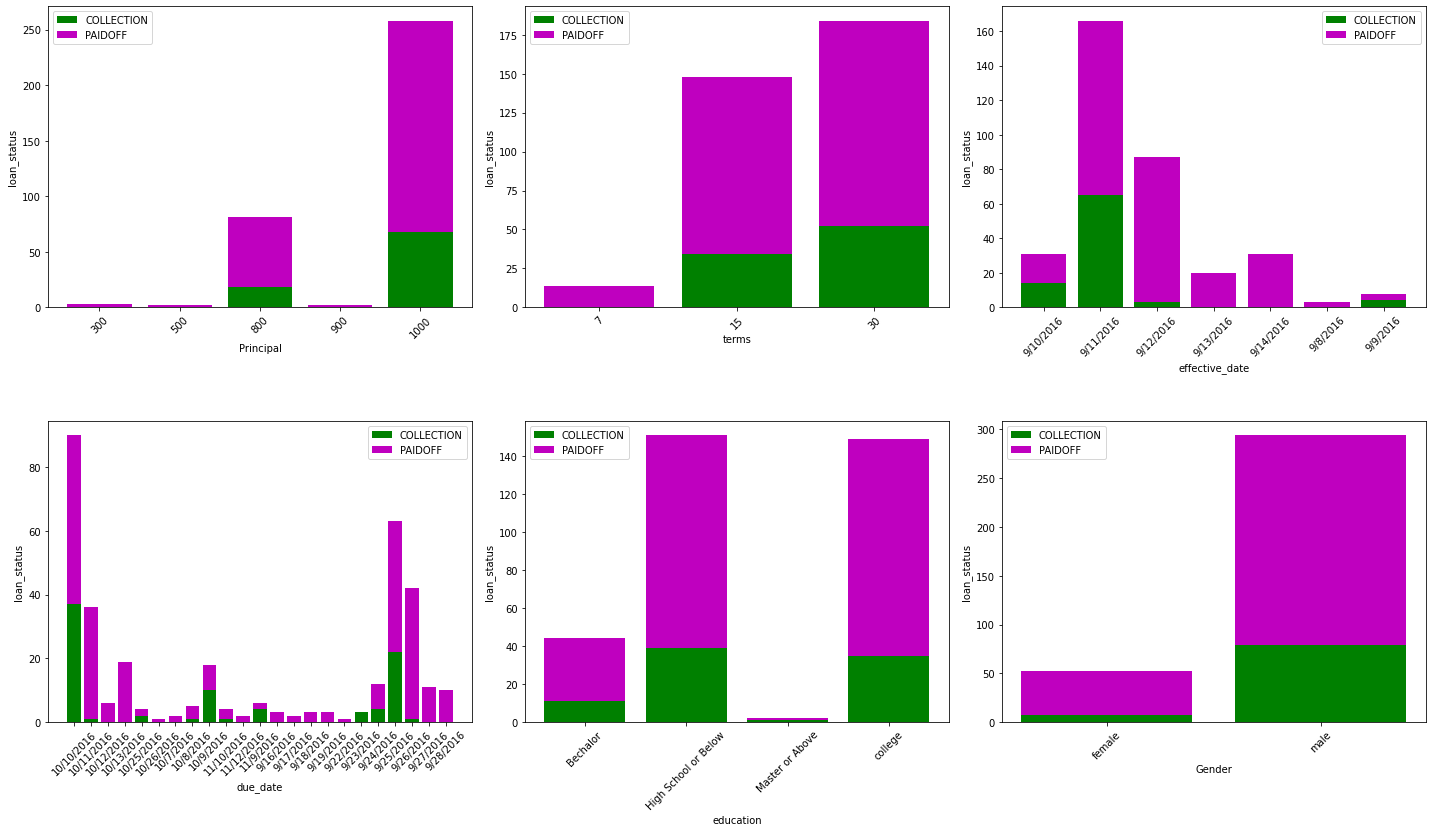

In [124]:
cat_inputs = ['Principal','terms','effective_date','due_date','education','Gender']
fig = plt.figure(figsize=(20,16))
for i in range(1,len(cat_inputs)+1):
    ax = fig.add_subplot(3,3,i)
    table = pd.crosstab(df[cat_inputs[i-1]], df['loan_status']).reset_index()
    ax.bar(table[cat_inputs[i-1]].astype(str), table['COLLECTION'], color='g',label='COLLECTION')
    ax.bar(table[cat_inputs[i-1]].astype(str), table['PAIDOFF'], bottom=table['COLLECTION'], color='m',label='PAIDOFF')
    plt.xticks(rotation= 45)
    plt.legend()
    plt.xlabel(cat_inputs[i-1])
    plt.ylabel('loan_status')
plt.tight_layout()
plt.show()

In [125]:
#Chi-square Test: H0 - Independent
from scipy.stats import chi2_contingency, chi2
chi2_test_df=pd.DataFrame(index=cat_var,columns=cat_var)
#chi2_test_df

In [126]:
alpha = 0.05
for i in range (len(cat_var)):
    for j in range(i+1,len(cat_var)):
        table = pd.crosstab(df[cat_var[i]],df[cat_var[j]])
        stat, p, dof, expected = chi2_contingency(table)
        #print('\n*** significance = %.3f, p_value = %.3f' %(alpha,p))
        if p < alpha:
            #print(dependent_cat_list[i],'&',dependent_cat_list[j],'==> Dependent (Reject H0)')
            chi2_test_df.loc[cat_var[i],cat_var[j]]='Dependent'
        else:
            #print(dependent_cat_list[i],'&',dependent_cat_list[j],'==> Independent (Fail to Reject H0)')
            chi2_test_df.loc[cat_var[i],cat_var[j]]='Independent'
chi2_test_df

,loan_status,Principal,terms,effective_date,due_date,education,Gender
loan_status,NaN,Independent,Dependent,Dependent,Dependent,Independent,Independent
Principal,NaN,NaN,Dependent,Independent,Dependent,Independent,Independent
terms,NaN,NaN,NaN,Independent,Dependent,Independent,Independent
effective_date,NaN,NaN,NaN,NaN,Dependent,Independent,Independent
due_date,NaN,NaN,NaN,NaN,NaN,Independent,Independent
education,NaN,NaN,NaN,NaN,NaN,NaN,Independent
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Nhận xét:
- 'terms', 'effective_date', 'due_date' phụ thuộc với 'loan_status'

### Handle the Missing Values

In [127]:
df.isnull().sum()        # không có giá trị null

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

### Handle Outlier Values

In [128]:
import scipy
upper_outliers = df['age'][df['age'] > (np.quantile(df['age'],0.75) + 1.5*scipy.stats.iqr(df['age']))]
upper_outliers

41     50
184    50
223    51
293    50
Name: age, dtype: int64

### Nhận xét:
- Các outliers 'age' đều valid => không loại bỏ outliers

### Convert 'due_date', 'effective_date' to date time object 

In [129]:
def convert_to_datetime(var,df):
    df[var] = pd.to_datetime(df[var], format='%m/%d/%Y')
for var in ['due_date','effective_date']:
    convert_to_datetime(var,df)    

In [130]:
#df.head()

In [131]:
#df.info()

# Data visualization

How many sample of each class is in our data set?

In [132]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

**260** people have paid off the loan on time while **86** have gone into collection 

Lets plot some columns to underestand data better:
- Use seaborn or matplotlib to draw some plots like that:

In [133]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [134]:
img1 = np.array(Image.open('Principal_Male_Female.jpg'))

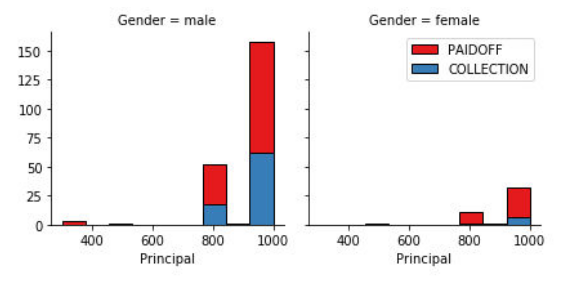

In [135]:
plt.figure(figsize=(10,5))
plt.imshow(img1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [136]:
data1 = df.groupby(['Principal','Gender','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
data1.head()

loan_status,Principal,Gender,COLLECTION,PAIDOFF
0,300,male,0.0,3.0
1,500,female,0.0,1.0
2,500,male,0.0,1.0
3,800,female,1.0,11.0
4,800,male,17.0,52.0


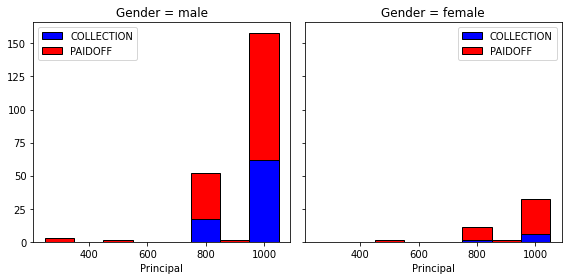

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

In [137]:
gender = data1['Gender'].unique() 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharex='all', sharey='all')
for i in range(1,len(gender)+1):
    table = data1[data1['Gender'] == gender[i-1]][['Principal','COLLECTION','PAIDOFF']] 
    ax[i-1].bar(table['Principal'], table['COLLECTION'], width=100, color='b', edgecolor='black', label='COLLECTION') 
    ax[i-1].bar(table['Principal'], table['PAIDOFF']-table['COLLECTION'], width=100
                , bottom=table['COLLECTION'], color='r',edgecolor='black', label='PAIDOFF')
    ax[i-1].set_xlabel('Principal')
    ax[i-1].set_xticks([400,600,800,1000])
    ax[i-1].set_yticks(np.arange(0,175,25))
    ax[i-1].set_title(f'Gender = %s' %(gender[i-1]))
    ax[i-1].legend()
plt.tight_layout()
plt.show()
plt.bar

In [138]:
img2 = np.array(Image.open('Age_Male_Female.jpg'))

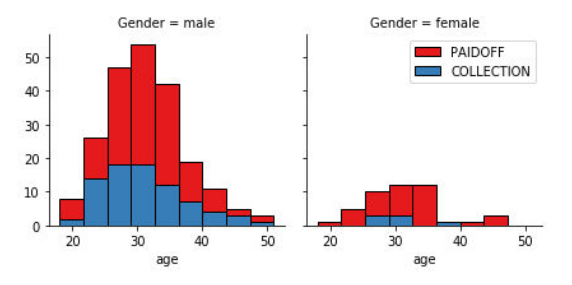

In [139]:
plt.figure(figsize=(10,5))
plt.imshow(img2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [140]:
data2 = df.groupby(['Gender','age','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
data2.head()

loan_status,Gender,age,COLLECTION,PAIDOFF
0,female,19,0.0,1.0
1,female,23,0.0,2.0
2,female,24,0.0,2.0
3,female,25,0.0,1.0
4,female,26,1.0,4.0


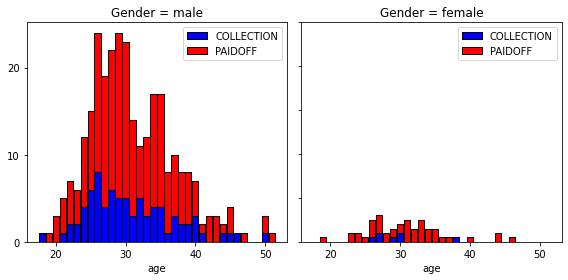

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharex='all', sharey='all')
for i in range(1,len(gender)+1):
    table = data2[data2['Gender'] == gender[i-1]][['age','COLLECTION','PAIDOFF']] 
    ax[i-1].bar(table['age'], table['COLLECTION'], width=0.9, color='b', edgecolor='black', label='COLLECTION') 
    ax[i-1].bar(table['age'], table['PAIDOFF'], width=0.9, bottom=table['COLLECTION']
                , color='r', edgecolor='black', label='PAIDOFF')
    ax[i-1].set_xlabel('age')
    ax[i-1].set_xticks([20,30,40,50])
    ax[i-1].set_yticks(np.arange(0,60,10))
    ax[i-1].set_title(f'Gender = %s' %(gender[i-1]))
    ax[i-1].legend()
plt.tight_layout()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

- Make new column 'dayofweek' from 'effective_date'
    - Example: 2016-09-08 => dayofweek is 3 (The day of the week with Monday=0, Sunday=6)
    - Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

In [142]:
def convert_to_dayofweek(var,df):
    result = df[var].dt.dayofweek
    return result
df['dayofweek']= convert_to_dayofweek('effective_date',df)    

In [143]:
#df.head()

Lets plot some columns to underestand data better:

In [144]:
img3 = np.array(Image.open('day_of_week.jpg'))

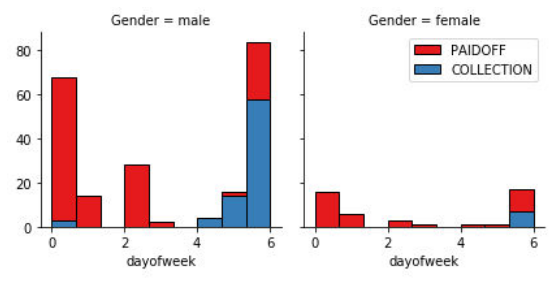

In [145]:
plt.figure(figsize=(10,5))
plt.imshow(img3, interpolation='bilinear')
plt.axis('off')
plt.show()

In [146]:
data3 = df.groupby(['Gender','dayofweek','loan_status'])['loan_status'].count().unstack()
data3 = data3.fillna(0).reset_index()
data3.head()

loan_status,Gender,dayofweek,COLLECTION,PAIDOFF
0,female,0,0.0,16.0
1,female,1,0.0,6.0
2,female,2,0.0,3.0
3,female,3,0.0,1.0
4,female,4,0.0,1.0


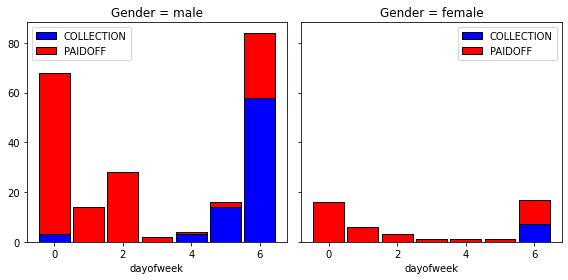

In [147]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharex='all', sharey='all')
for i in range(1,len(gender)+1):
    table = data3[data3['Gender'] == gender[i-1]][['dayofweek','COLLECTION','PAIDOFF']] 
    ax[i-1].bar(table['dayofweek'], table['COLLECTION'], width=0.9, color='b', edgecolor='black', label='COLLECTION') 
    ax[i-1].bar(table['dayofweek'], table['PAIDOFF'] - table['COLLECTION'], width=0.9, bottom=table['COLLECTION']
                , color='r', edgecolor='black', label='PAIDOFF')
    ax[i-1].set_xlabel('dayofweek')
    ax[i-1].set_xticks([0,2,4,6])
    ax[i-1].set_yticks(np.arange(0,100,20))
    ax[i-1].set_title(f'Gender = %s' %(gender[i-1]))
    ax[i-1].legend()
plt.tight_layout()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so lets use Feature binarization to set a threshold values less then day 4 
- Make new column 'weekend': =1 if 'dayofweek'>3, else =0

In [148]:
def binary_encode_weekend(var,df):
    result = df[var].apply(lambda x: 1 if x>3 else 0)
    return result
df['weekend'] = binary_encode_weekend('dayofweek',df)

In [149]:
#df.head()

## Convert Categorical features to numerical values

- groupby 'Gender' and count by 'loan_status'

In [150]:
print(df.groupby('Gender')['loan_status'].value_counts())
print('-'*50)
print(df.groupby('Gender')['loan_status'].value_counts()/df.groupby('Gender')['loan_status'].count())

Gender  loan_status
female  PAIDOFF         45
        COLLECTION       7
male    PAIDOFF        215
        COLLECTION      79
Name: loan_status, dtype: int64
--------------------------------------------------
Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64


**86,53** % of female pay there loans while only **73,13** % of males pay there loan

Lets convert male to 0 and female to 1:

In [151]:
def binary_encode(df, var, positive_value):
    result = df[var].apply(lambda x: 1 if x == positive_value else 0)
    return result

In [152]:
df['Gender'] = binary_encode(df, 'Gender', positive_value='female')

In [153]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

- groupby 'education' and count by 'loan_status'

In [154]:
df.groupby('education')['loan_status'].count()

education
Bechalor                 44
High School or Below    151
Master or Above           2
college                 149
Name: loan_status, dtype: int64

#### Feature before One Hot Encoding
- Print head() data with 5 columns: 'Principal','terms','age','Gender','education'

In [155]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

- Make new dataframe **Feature** has: 'Principal','terms','age','Gender','weekend', 'education'
- In **Feature**: Use one hot encoding technique to convert 'education' to binary variable, then drop column 'Master or Above'

In [156]:
Feature = df[['Principal','terms','age','Gender','weekend','education']]

In [157]:
from sklearn.preprocessing import OneHotEncoder

In [158]:
def oneHotEncoder_func(var,df):
    encoder = OneHotEncoder()
    df_encoder = encoder.fit_transform(df[[var]])
    df_encoder = pd.DataFrame(df_encoder.toarray(), 
                         columns=[i for i in encoder.categories_[0]])
    df_encoder = pd.concat([df, df_encoder],axis=1)
    return df_encoder

In [159]:
Feature = oneHotEncoder_func('education',Feature).drop(['education','Master or Above'],axis=1)

In [160]:
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0.0,1.0,0.0
1,1000,30,33,1,0,1.0,0.0,0.0
2,1000,15,27,0,0,0.0,0.0,1.0
3,1000,30,28,1,1,0.0,0.0,1.0
4,1000,30,29,0,1,0.0,0.0,1.0


### Feature selection

Lets defind feature sets, X:
- X is inputs, X = Features

In [161]:
X = Feature 

What are our lables?
- y is output, y = 'loan_status' column

In [162]:
y = binary_encode(df, 'loan_status', positive_value='PAIDOFF')

In [163]:
y.value_counts()

1    260
0     86
Name: loan_status, dtype: int64

## Scaler Data 

Find the suitable Scaler to scale data of X (if we need to do to have a better prediction)

# Classification 

Now, use the training set to build an accurate model. Then use the test set (loan_test.csv) to report the accuracy of the model
You should use the following algorithm:
- Logistic Regression

__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Logistic Regression

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score

In [165]:
def model_evaluation_logit(model, X_train, y_train, X_test, y_test, name):
    #training score
    training_score = model.score(X_train, y_train)
    #test score
    test_score = model.score(X_test, y_test)
    yhat_train = model.predict(X_train)
    yhat_test = model.predict(X_test)
    f1Score_paidoff = f1_score(y_true=y_test, y_pred=yhat_test, pos_label=1)
    f1Score_collection = f1_score(y_true=y_test, y_pred=yhat_test, pos_label=0)
    accuracyScore = accuracy_score(y_true=y_test, y_pred=yhat_test)
    #Kiem tra do chinh xac = confusion matrix
    confusionMatrix = confusion_matrix(y_true=y_test, y_pred=yhat_test)
    #tinh precision, recall
    recall_collection = recall_score(y_true= y_test, y_pred = yhat_test, pos_label=0)
    recall_paidoff = recall_score(y_true= y_test, y_pred = yhat_test, pos_label=1)
    precision_collection = precision_score(y_true= y_test, y_pred = yhat_test, pos_label=0)
    precision_paidoff = precision_score(y_true= y_test, y_pred = yhat_test, pos_label=1)
    classificationReport = classification_report(y_true=y_test, y_pred=yhat_test)
    print('Training Score:\t',training_score)
    print('Test Score:\t',test_score)
    print('--- Confusion matrix:\n',confusionMatrix)
    print('--- Classification report:\n',classificationReport)
    result = pd.DataFrame([accuracyScore,recall_paidoff,recall_collection,precision_paidoff,precision_collection,f1Score_paidoff,f1Score_collection]
                          ,index=['Accuracy Score','Recall PAIDOFF','Recall COLLECTION','Precision PAIDOFF'
                                  ,'Precision COLLECTION','F1Score PAIDOFF','F1Score COLLECTION']
                          ,columns=[name]).T
    return result

In [166]:
# Split X, y to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [167]:
X_train.shape, X_test.shape

((242, 8), (104, 8))

### Model_1 - Selected Features

In [168]:
model_1 = LogisticRegression(solver='liblinear')

In [169]:
model_1.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [170]:
# Model Evaluation
result1 = model_evaluation_logit(model_1, X_train, y_train, X_test, y_test,'Selected Features')
result1

Training Score:	 0.7727272727272727
Test Score:	 0.7115384615384616
--- Confusion matrix:
 [[ 6 22]
 [ 8 68]]
--- Classification report:
               precision    recall  f1-score   support

           0       0.43      0.21      0.29        28
           1       0.76      0.89      0.82        76

    accuracy                           0.71       104
   macro avg       0.59      0.55      0.55       104
weighted avg       0.67      0.71      0.68       104



,Accuracy Score,Recall PAIDOFF,Recall COLLECTION,Precision PAIDOFF,Precision COLLECTION,F1Score PAIDOFF,F1Score COLLECTION
Selected Features,0.711538,0.894737,0.214286,0.755556,0.428571,0.819277,0.285714


### Nhận xét:     ** Model_1 **
- Xác định rất tốt các khoản vay trả đúng hạn (Paidoff) với precision khá
- Xác định không tốt/không xác định được các khoản vay xấu (Collection) với precision trung bình

### Load Test file for prediction

In [171]:
df_test = pd.read_csv('loan_test.csv', usecols=cols_name)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     54 non-null     object
 1   Principal       54 non-null     int64 
 2   terms           54 non-null     int64 
 3   effective_date  54 non-null     object
 4   due_date        54 non-null     object
 5   age             54 non-null     int64 
 6   education       54 non-null     object
 7   Gender          54 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.5+ KB


In [172]:
df_test['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [173]:
df_test_now = df_test.copy()

In [174]:
df_test_now.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [175]:
for var in ['due_date','effective_date']:
    convert_to_datetime(var,df_test_now)    

df_test_now['dayofweek']= convert_to_dayofweek('effective_date',df_test_now)  
df_test_now['weekend'] = binary_encode_weekend('dayofweek',df_test_now)
df_test_now['Gender'] = binary_encode(df_test_now, 'Gender', positive_value='female')

In [176]:
df_test_now.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [177]:
Feature_test = df_test_now[['Principal','terms','age','Gender','weekend','education']]
Feature_test = oneHotEncoder_func('education',Feature_test).drop(['education','Master or Above'],axis=1)
Feature_test.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1.0,0.0,0.0
1,300,7,35,0,1,0.0,0.0,0.0
2,1000,30,43,1,1,0.0,1.0,0.0
3,1000,30,26,0,1,0.0,0.0,1.0
4,800,15,29,0,1,1.0,0.0,0.0


In [178]:
X_test_now = Feature_test

In [179]:
y_test_now = binary_encode(df_test, 'loan_status', positive_value='PAIDOFF')

In [180]:
yhat_test_now=model_1.predict(X_test_now)

In [181]:
yhat_test_now

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [182]:
def quick_evaluation(y_true,y_pred):
    accuracyScore = accuracy_score(y_true, y_pred)
    #Kiem tra do chinh xac = confusion matrix
    confusionMatrix = confusion_matrix(y_true, y_pred)
    #tinh precision, recall
    classificationReport = classification_report(y_true, y_pred)
    print(confusionMatrix)
    print(classificationReport)

In [183]:
#Đánh giá trên tập loan_test.csv
quick_evaluation(y_test_now,yhat_test_now)

[[ 2 12]
 [ 4 36]]
              precision    recall  f1-score   support

           0       0.33      0.14      0.20        14
           1       0.75      0.90      0.82        40

    accuracy                           0.70        54
   macro avg       0.54      0.52      0.51        54
weighted avg       0.64      0.70      0.66        54



In [184]:
df_test['loan_status'] = yhat_test_now

In [185]:
df_test.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,0,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,1,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,1,1000,30,9/10/2016,10/9/2016,26,college,male
4,1,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Model_2 - Resampling data

In [186]:
# Oversampling
from imblearn.over_sampling import SMOTE

In [187]:
sm = SMOTE()
X_resample, y_resample = sm.fit_resample(X_train, y_train)

In [188]:
y_resample.value_counts()

1    184
0    184
Name: loan_status, dtype: int64

In [189]:
model_2 = LogisticRegression(solver='liblinear')
model_2.fit(X_resample, y_resample)

LogisticRegression(solver='liblinear')

In [190]:
# Model Evaluation
result2 = model_evaluation_logit(model_2,  X_resample, y_resample, X_test, y_test,'Resampling')
result2

Training Score:	 0.8016304347826086
Test Score:	 0.6057692307692307
--- Confusion matrix:
 [[22  6]
 [35 41]]
--- Classification report:
               precision    recall  f1-score   support

           0       0.39      0.79      0.52        28
           1       0.87      0.54      0.67        76

    accuracy                           0.61       104
   macro avg       0.63      0.66      0.59       104
weighted avg       0.74      0.61      0.63       104



,Accuracy Score,Recall PAIDOFF,Recall COLLECTION,Precision PAIDOFF,Precision COLLECTION,F1Score PAIDOFF,F1Score COLLECTION
Resampling,0.605769,0.539474,0.785714,0.87234,0.385965,0.666667,0.517647


In [191]:
#Đánh giá trên tập loan_test.csv
yhat_test_now2 = model_2.predict(X_test_now)
quick_evaluation(y_test_now,yhat_test_now2)

[[12  2]
 [16 24]]
              precision    recall  f1-score   support

           0       0.43      0.86      0.57        14
           1       0.92      0.60      0.73        40

    accuracy                           0.67        54
   macro avg       0.68      0.73      0.65        54
weighted avg       0.79      0.67      0.69        54



### Nhận xét:     ** Model_2 **
- Xác định các khoản vay trả đúng hạn ở mức khá (Paidoff) với precision cao
- Xác định tốt các khoản vay xấu (Collection) với precision trung bình

### Model_3 Resampling w/o 'age'

In [192]:
X_3 = Feature.drop(['age'],axis=1)
y_3 = y 

In [193]:
y_3.value_counts()

1    260
0     86
Name: loan_status, dtype: int64

In [194]:
# Split X_3, y_3 to train and test
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3,y_3,test_size=0.3)

In [195]:
sm3 = SMOTE()
X_resample3, y_resample3 = sm.fit_resample(X_train3, y_train3)

In [196]:
y_resample3.value_counts()

1    182
0    182
Name: loan_status, dtype: int64

In [197]:
model_3 = LogisticRegression(solver='liblinear')
model_3.fit(X_resample3, y_resample3)

LogisticRegression(solver='liblinear')

In [198]:
# Model Evaluation
result3 = model_evaluation_logit(model_3,  X_resample3, y_resample3, X_test3, y_test3,'Resampling w/o "age"')
result3

Training Score:	 0.7884615384615384
Test Score:	 0.6346153846153846
--- Confusion matrix:
 [[22  4]
 [34 44]]
--- Classification report:
               precision    recall  f1-score   support

           0       0.39      0.85      0.54        26
           1       0.92      0.56      0.70        78

    accuracy                           0.63       104
   macro avg       0.65      0.71      0.62       104
weighted avg       0.79      0.63      0.66       104



,Accuracy Score,Recall PAIDOFF,Recall COLLECTION,Precision PAIDOFF,Precision COLLECTION,F1Score PAIDOFF,F1Score COLLECTION
"Resampling w/o ""age""",0.634615,0.564103,0.846154,0.916667,0.392857,0.698413,0.536585


In [199]:
#Đánh giá trên tập loan_test.csv
yhat_test_now3 = model_3.predict(X_test_now.drop('age',axis=1))
quick_evaluation(y_test_now,yhat_test_now3)

[[10  4]
 [16 24]]
              precision    recall  f1-score   support

           0       0.38      0.71      0.50        14
           1       0.86      0.60      0.71        40

    accuracy                           0.63        54
   macro avg       0.62      0.66      0.60        54
weighted avg       0.73      0.63      0.65        54



### Nhận xét:     ** Model_3 **
- Xác định các khoản vay trả đúng hạn ở mức khá (Paidoff) với precision cao
- Xác định tốt các khoản vay xấu (Collection) với precision trung bình

### Model_4 Resampling w/o 'Gender'

In [200]:
X_4 = Feature.drop(['age','Gender'],axis=1)
y_4 = y 

In [201]:
y_4.value_counts()

1    260
0     86
Name: loan_status, dtype: int64

In [202]:
# Split X_4, y_4 to train and test
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_4,y_4,test_size=0.3)

In [203]:
sm4 = SMOTE()
X_resample4, y_resample4 = sm.fit_resample(X_train4, y_train4)

In [204]:
y_resample4.value_counts()

1    186
0    186
Name: loan_status, dtype: int64

In [205]:
model_4 = LogisticRegression(solver='liblinear')
model_4.fit(X_resample4, y_resample4)

LogisticRegression(solver='liblinear')

In [206]:
# Model Evaluation
result4 = model_evaluation_logit(model_4,  X_resample4, y_resample4, X_test4, y_test4,'Resampling w/o "Gender","age"')
result4

Training Score:	 0.7311827956989247
Test Score:	 0.7019230769230769
--- Confusion matrix:
 [[28  2]
 [29 45]]
--- Classification report:
               precision    recall  f1-score   support

           0       0.49      0.93      0.64        30
           1       0.96      0.61      0.74        74

    accuracy                           0.70       104
   macro avg       0.72      0.77      0.69       104
weighted avg       0.82      0.70      0.71       104



,Accuracy Score,Recall PAIDOFF,Recall COLLECTION,Precision PAIDOFF,Precision COLLECTION,F1Score PAIDOFF,F1Score COLLECTION
"Resampling w/o ""Gender"",""age""",0.701923,0.608108,0.933333,0.957447,0.491228,0.743802,0.643678


In [207]:
#Đánh giá trên tập loan_test.csv
yhat_test_now4 = model_4.predict(X_test_now.drop(['Gender','age'],axis=1))
quick_evaluation(y_test_now,yhat_test_now4)

[[13  1]
 [18 22]]
              precision    recall  f1-score   support

           0       0.42      0.93      0.58        14
           1       0.96      0.55      0.70        40

    accuracy                           0.65        54
   macro avg       0.69      0.74      0.64        54
weighted avg       0.82      0.65      0.67        54



### Nhận xét:     ** Model_4 **
- Xác định các khoản vay trả đúng hạn ở mức khá (Paidoff) với precision cao
- Xác định tốt các khoản vay xấu (Collection) với precision trung bình

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Accuracy Score | 
|--------------------|---------|
| LogisticRegression | ?       | 

In [208]:
report2 = pd.concat([result1, result2, result3, result4],axis=0)
report2

,Accuracy Score,Recall PAIDOFF,Recall COLLECTION,Precision PAIDOFF,Precision COLLECTION,F1Score PAIDOFF,F1Score COLLECTION
Selected Features,0.711538,0.894737,0.214286,0.755556,0.428571,0.819277,0.285714
Resampling,0.605769,0.539474,0.785714,0.872340,0.385965,0.666667,0.517647
"Resampling w/o ""age""",0.634615,0.564103,0.846154,0.916667,0.392857,0.698413,0.536585
"Resampling w/o ""Gender"",""age""",0.701923,0.608108,0.933333,0.957447,0.491228,0.743802,0.643678


### Kết Luận:
- Nếu mục tiêu đi xác định khoản vay trả đúng hẹn (Paidoff) thì chọn Model_1 (Selected Features) 
- Nếu mục tiêu đi xác định khoản vay xấu (Colletion) thì chọn 1 trong 3 Model_3 còn lại (có Resampling)

<h3>Thanks for completing this project!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>
<hr>
<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>